<a href="https://colab.research.google.com/github/ShreshtaP/-Shreshta_INFO5731_-Fall2021/blob/main/In_class_exercise_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [3]:
# Write your code here
import pandas as pd
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from nltk.stem import PorterStemmer
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
def reading_data(file_path):
  text_data, sentiments = [], []
  file_data = open(file_path).read()
  for i, j in enumerate(file_data.split("\n")):
    after_split = j.split(' ')
    text_data.append(" ".join(after_split[1:]))
    sentiments.append(after_split[0])
  return text_data, sentiments

In [7]:
training_text_data, training_sentiments = reading_data('stsa-train.txt')
training_df = pd.DataFrame(list(zip(training_sentiments, training_text_data)), columns = ['Sentimental Value', 'Raw Data'])
testing_text_data, testing_sentiments = reading_data('stsa-test.txt')
testing_df = pd.DataFrame(list(zip(testing_sentiments, testing_text_data)), columns = ['Sentimental Value', 'Raw Data'])

In [8]:
#Pre-processing
#removal of special characters
training_df['After noise removal'] = training_df['Raw Data'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
testing_df['After noise removal'] = testing_df['Raw Data'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
# removal of Punctuation
training_df['Punctuation removal'] = training_df['After noise removal'].str.replace('[^\w\s]','')
testing_df['Punctuation removal'] = testing_df['After noise removal'].str.replace('[^\w\s]','')
# Stopwords removal
stop_word = stopwords.words('english')
training_df['Stopwords removal'] = training_df['Punctuation removal'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
testing_df['Stopwords removal'] = testing_df['Punctuation removal'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
# Lower Casing
training_df['Lower casing'] = training_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
testing_df['Lower casing'] = testing_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
tfidf_vector = TfidfVectorizer(analyzer = 'word')
tfidf_vector.fit(training_df['Lower casing'])
x =  tfidf_vector.transform(training_df['Lower casing'])
tfidf_vector_test = TfidfVectorizer(analyzer='word', vocabulary = tfidf_vector.vocabulary_)
tfidf_vector_test.fit(testing_df['Lower casing'])
test_values_x = tfidf_vector_test.transform(testing_df['Lower casing'])

In [10]:
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, training_df['Sentimental Value'],test_size=0.2)

In [11]:
def csv(model, x_data, y_data):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7, shuffle=True)
  return cross_val_score(model, x_data, y_data, cv=kfold).mean()

In [12]:
def training_model(model_intializer):
  model = model_intializer
  model.fit(xtrain, ytrain)
  predicted = model.predict(xvalid)
  accuracy = accuracy_score(predicted, yvalid)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))
  predicted_testing = model.predict(test_values_x)
  accuracy_testing = accuracy_score(predicted_testing, testing_df['Sentimental Value'])
  print("Accuracy of Testing data: {0}".format(accuracy_testing))
  print(classification_report(testing_df['Sentimental Value'], predicted_testing))
  if 'XGB' not in str(model):
    print("Cross validation score obtained: {0}".format(csv(model, test_values_x, testing_df['Sentimental Value'])))

In [13]:
training_model(naive_bayes.MultinomialNB())

Accuracy of Traning data: 0.7790613718411552
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       682
           1       0.74      0.88      0.80       703

    accuracy                           0.78      1385
   macro avg       0.79      0.78      0.78      1385
weighted avg       0.79      0.78      0.78      1385

Accuracy of Testing data: 0.7870472008781558
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.86      0.68      0.76       912
           1       0.74      0.89      0.81       909

    accuracy                           0.79      1822
   macro avg       0.53      0.53      0.52      1822
weighted avg       0.80      0.79      0.78      1822

Cross validation score obtained: 0.7365309553834145


In [14]:
training_model(svm.SVC())

Accuracy of Traning data: 0.7660649819494585
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       682
           1       0.74      0.83      0.78       703

    accuracy                           0.77      1385
   macro avg       0.77      0.77      0.76      1385
weighted avg       0.77      0.77      0.76      1385

Accuracy of Testing data: 0.7897914379802415
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.82      0.74      0.78       912
           1       0.76      0.84      0.80       909

    accuracy                           0.79      1822
   macro avg       0.53      0.53      0.53      1822
weighted avg       0.79      0.79      0.79      1822

Cross validation score obtained: 0.7217017954722873


In [15]:
training_model(KNeighborsClassifier(n_neighbors = 5))

Accuracy of Traning data: 0.49747292418772565
              precision    recall  f1-score   support

           0       0.49      0.99      0.66       682
           1       0.71      0.02      0.03       703

    accuracy                           0.50      1385
   macro avg       0.60      0.50      0.35      1385
weighted avg       0.60      0.50      0.34      1385

Accuracy of Testing data: 0.508781558726674
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.50      1.00      0.67       912
           1       0.89      0.02      0.04       909

    accuracy                           0.51      1822
   macro avg       0.47      0.34      0.24      1822
weighted avg       0.70      0.51      0.35      1822

Cross validation score obtained: 0.5005464480874318


In [16]:
training_model(DecisionTreeClassifier())

Accuracy of Traning data: 0.6548736462093863
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       682
           1       0.67      0.64      0.65       703

    accuracy                           0.65      1385
   macro avg       0.66      0.66      0.65      1385
weighted avg       0.66      0.65      0.65      1385

Accuracy of Testing data: 0.6569703622392975
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.65      0.69      0.67       912
           1       0.67      0.63      0.65       909

    accuracy                           0.66      1822
   macro avg       0.44      0.44      0.44      1822
weighted avg       0.66      0.66      0.66      1822

Cross validation score obtained: 0.6169218759382693


In [17]:
training_model(RandomForestClassifier())

Accuracy of Traning data: 0.7111913357400722
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       682
           1       0.72      0.72      0.72       703

    accuracy                           0.71      1385
   macro avg       0.71      0.71      0.71      1385
weighted avg       0.71      0.71      0.71      1385

Accuracy of Testing data: 0.7349066959385291
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.73      0.75      0.74       912
           1       0.74      0.72      0.73       909

    accuracy                           0.73      1822
   macro avg       0.49      0.49      0.49      1822
weighted avg       0.73      0.73      0.73      1822

Cross validation score obtained: 0.6542424788326427


In [18]:
training_model(XGBClassifier())
scoring = 'accuracy'
kfold = KFold(10, random_state = 7, shuffle=True)
print("Cross validation score obtained: {0}".format(cross_val_score(XGBClassifier(), test_values_x, testing_df['Sentimental Value']).mean()))

Accuracy of Traning data: 0.6072202166064982
              precision    recall  f1-score   support

           0       0.69      0.37      0.48       682
           1       0.58      0.83      0.68       703

    accuracy                           0.61      1385
   macro avg       0.63      0.60      0.58      1385
weighted avg       0.63      0.61      0.58      1385

Accuracy of Testing data: 0.6514818880351262
              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
           0       0.75      0.46      0.57       912
           1       0.61      0.85      0.71       909

    accuracy                           0.65      1822
   macro avg       0.45      0.43      0.43      1822
weighted avg       0.68      0.65      0.64      1822

Cross validation score obtained: 0.6059220231822973


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [39]:
#import libraries
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:

data_df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [41]:
# OBSERVATIONS
print("Shape: {0}".format(data_df.shape))

Shape: (260872, 6)


In [42]:
cluster_data_df = data_df.head(1000)
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3.0,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3.0,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5.0,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5.0,Excelent,0.0


In [43]:
# PRE PROCESSING

# removal of special characters
cluster_data_df['After noise removal'] = cluster_data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

#removal of punctations
cluster_data_df['Punctuation removal'] = cluster_data_df['After noise removal'].str.replace('[^\w\s]','')

# Removing numbers
cluster_data_df['Remove numbers'] = cluster_data_df['Punctuation removal'].str.replace('\d+', '')

#removal of stopwords
stop_word = stopwords.words('english')
cluster_data_df['Stopwords removal'] = cluster_data_df['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))

# Lower Casing
cluster_data_df['Lower casing'] = cluster_data_df['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization
cluster_data_df['Tokenization'] = cluster_data_df['Lower casing'].apply(lambda x: TextBlob(x).words)

# Stemming
st = PorterStemmer()
cluster_data_df['Stemming'] = cluster_data_df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

# Lemmatization
cluster_data_df['Lemmatization'] = cluster_data_df['Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3.0,It's a decent for the price.. I've had this on...,0.0,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It s a decent for the price I ve had this on...,It decent price I one months The cons I pretty...,it decent price i one months the cons i pretty...,"[it, decent, price, i, one, months, the, cons,...",it decent price i one month the con i pretti f...,it decent price i one month the con i pretti f...
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3.0,Is good cell phone,0.0,Is good cell phone,Is good cell phone,Is good cell phone,Is good cell phone,is good cell phone,"[is, good, cell, phone]",is good cell phone,is good cell phone
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5.0,"Amazing phone. Cables and case included, also ...",0.0,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables and case included also ...,Amazing phone Cables case included also screen...,amazing phone cables case included also screen...,"[amazing, phone, cables, case, included, also,...",amaz phone cabl case includ also screen pritec...,amaz phone cabl case includ also screen pritec...
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5.0,Excelent,0.0,Excelent,Excelent,Excelent,Excelent,excelent,[excelent],excel,excel


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['Lemmatization'].values)
tfidf.shape

(1000, 2483)

In [45]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [46]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00044339, 0.00109302, 0.00746944, ..., 0.00648556, 0.00169077,
        0.00070448],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02834208, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [47]:

terms1 = tfidf_vect.get_feature_names()

In [48]:
terms1[1:10]

['abil',
 'abl',
 'ablebto',
 'about',
 'absolut',
 'abysm',
 'accent',
 'accept',
 'access']

In [49]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.08767419501657137

In [50]:
#assigning a cluster to each text 
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0,Very pleased,Very pleased,Very pleased,Very pleased,very pleased,"[very, pleased]",veri pleas,veri plea,3
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good but it goes slow sometimes but i...,It works good goes slow sometimes good phone I...,it works good goes slow sometimes good phone i...,"[it, works, good, goes, slow, sometimes, good,...",it work good goe slow sometim good phone i love,it work good goe slow sometim good phone i love,9
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone to replace my lost phone The only...,Great phone replace lost phone The thing volum...,great phone replace lost phone the thing volum...,"[great, phone, replace, lost, phone, the, thin...",great phone replac lost phone the thing volum ...,great phone replac lost phone the thing volum ...,8


In [51]:
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     12
1    189
2     52
3    351
4     21
5     33
6     47
7     62
8    172
9     61
Name: Reviews, dtype: int64

In [52]:

print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: bueno
 muy
 excelent
 bien
 excelet
 gracia
 form
 forth
 freez
 freeli
Cluster 1: phone
 it
 the
 use
 like
 screen
 review
 card
 camera
 good
Cluster 2: excel
 product
 recommend
 seller
 thank
 phone
 fash
 function
 five
 cellphon
Cluster 3: phone
 great
 good
 use
 expect
 it
 the
 like
 product
 thank
Cluster 4: ok
 far
 wcdma
 it
 quit
 peopl
 someon
 buy
 slow
 phone
Cluster 5: excelent
 telefono
 producto
 zip
 foundat
 freedom
 free
 freak
 frame
 fraction
Cluster 6: love
 phone
 great
 use
 my
 like
 mom
 it
 easi
 buy
Cluster 7: work
 bad
 item
 the
 it
 phone
 great
 die
 so
 put
Cluster 8: phone
 work
 great
 charg
 call
 would
 return
 the
 sim
 card
Cluster 9: good
 veri
 phone
 product
 price
 buy
 tank
 thank
 mobil
 recomend


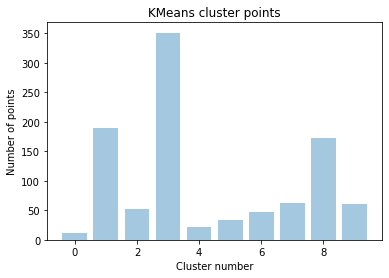

In [53]:
# visually representation of how points/reviews are distributed across 10 clusters 

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [54]:
#Reading a review belonging to each group.

for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
MUY BUENO


muy bien


excelente muy bueno


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


Just... not good. The phone has great screen resolution, storage is low, you need an SD card to do anything. May have a clear ESN but don't expect to use it with things like Freedompop.


Nokia Asha 302 Unlocked GSM Phone with 3.2MP Camera, Video, QWERTYDependableTraditional Nokia Menu'sNot Com

In [55]:
#K-means - Method 2 
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['Reviews'].values)
bow.shape

(1000, 3455)

In [56]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [57]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [58]:
from sklearn import metrics
print(metrics.silhouette_score(bow, labels, metric='euclidean'))

0.396624076509732


In [59]:
cluster_data_df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
cluster_data_df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1,5
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3,0


In [60]:
#DBSCAN clustering 
from sklearn.cluster import DBSCAN
import numpy as np

In [61]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if (len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
          l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
          if l < 200 and l >= 0 and dists[l] > dist:
              dists[l] = dist
        else:
          dists.append(dist)
          dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [62]:
list_of_trains_sent = list()

for i in cluster_data_df["Lower casing"].values:
  list_of_trains_sent.append(i.split())

In [63]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_trains_sent, size=100, workers=4)

In [64]:
import numpy as np
The_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
count = 1
for sent in list_of_sent_train: # for each review/sentence
    The_sent_vec = np.zeros(100) # as word vectors are of zero length
    The_cnt_words =1; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            The_sent_vec += vec
            The_cnt_words += 1
        except:
            pass
    The_sent_vec /= The_cnt_words
    The_sent_vectors.append(sent_vec)
The_sent_vectors = np.array(sent_vectors)
The_sent_vectors = np.nan_to_num(sent_vectors)

In [65]:
#Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneighbour = []
for val in sent_vectors[:300]:
    twohundrethneighbour.append(compute200thnearestneighbour(val, sent_vectors[:300]) )
twohundrethneighbour.sort()

In [66]:
#Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [67]:
cluster_data_df['AVG-W2V Clus Label'] = model.labels_
cluster_data_df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1,5,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3,0,0


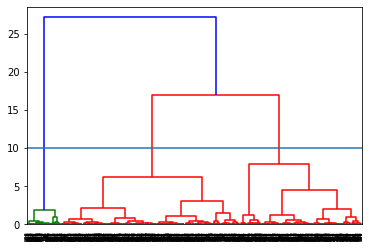

In [68]:
#Hierarchical Clustering 
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10) # cut at 30 to get 5 clusters

In [69]:

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [70]:
#Giving Labels/assigning a cluster to each point/text 
aggdfa = cluster_data_df
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,After noise removal,Punctuation removal,Remove numbers,Stopwords removal,Lower casing,Tokenization,Stemming,Lemmatization,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel so LUCKY to have found this used phone...,I feel LUCKY found used phone us used hard pho...,i feel lucky found used phone us used hard pho...,"[i, feel, lucky, found, used, phone, us, used,...",i feel lucki found use phone us use hard phone...,i feel lucki found use phone u use hard phone ...,1,5,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice up grade from my pantach revu...,nice phone nice grade pantach revue Very clean...,nice phone nice grade pantach revue very clean...,"[nice, phone, nice, grade, pantach, revue, ver...",nice phone nice grade pantach revu veri clean ...,nice phone nice grade pantach revu veri clean ...,3,0,1


In [71]:
#Count of points belonging to each cluster ->
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    300
1    287
2    252
3     62
4     99
Name: Reviews, dtype: int64

In [72]:
#Reading a review which belong to each group.
for i in range(5):
    print("The two reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
unfortunately Sprint could not activate the phone due to the blocking issue with the phone, the matter was handled very well and quickly. Very satisfied with the service.


pros-beautiful screen,capable of running chrome,take good pictures,the keyboard is comfy,fits in my pocket and fit my hands,plays really good videos and gamescons-no Bluetooth,came late,run down fast really quick,doesnt play 1080p videos.but I would still recommend it to those who like to talk and text a lot like me and watch a lot of movies


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
#You can write you answer here. (No code needed)

The k-means algorithm divides a large dataset into a fixed number of clusters and then generalizes them into different sizes and shapes. It is very suitable to large datasets.
DBscan is used to distinguish between clusters with a high density and clusters with a low density. It is suitable for noisy data but not huge data sets.
Hierarichal Clustering is used for categorizing objects that are actually groups which are known as clusters. This method finds it a bit difficult to categorize the clusters and not suitable for hyper spherical shaped clusters.



